# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [62]:
# Import the required libraries and dependencies
# These are all the relevant dependencies and libraries that are imported to make the exercise work. The load_dotenv helps to import the 
# .env file that is in this folder. The alpaca_trade_api helps with the api call to alpaca to get up to date data. The MCForecastTools is alos a file
# in this folder that helps with the Monte Carlo Simulation. The reguests is a library that helps to make an api call and the json library helps
# to import the data from the aapi call and presents the data in a readable fashion.
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [63]:
# Load the environment variables from the .env file
# by calling the load_dotenv function
# Here you can see I am loading the dotenv file, this .env file is where my API Key and Secret Key are housed. Using this function is a 
# way to keep my api key safe on Github.

load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [64]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
# Here I am giving values to the variables btc_coins and eth_coins.

btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [65]:
# The monthly amount for the member's household income
# Here I am giving a value to a variable named monthly_income.

monthly_income=12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [66]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
# Here I am assigning these url's to these two variables so that I can call the url's without having to type it several times throughout the
# code. I do this because I am lazy. Also its efficient.

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [67]:
# Using the Python requests library, make an API call to access the current price of BTC
# Here I am making the request for the json data and passing the btc_url to the request command. This is how we get the data we are after.
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# This is the command to print the json data in a readable fashion. 

print(json.dumps(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 18854431,
            "id": 1,
            "last_updated": 1635209354,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 1192131994833,
                    "percent_change_1h": 0.0375212766474652,
                    "percent_change_24h": 2.61581849609191,
                    "percent_change_7d": 2.02603017746222,
                    "percentage_change_1h": 0.0375212766474652,
                    "percentage_change_24h": 2.61581849609191,
                    "percentage_change_7d": 2.02603017746222,
                    "price": 63274.0,
                    "volume_24h": 31620240016
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18854431,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenci

In [68]:
# Using the Python requests library, make an API call to access the current price ETH
# Again, here is the command to request the data from the api and we are passing the eth_url as the argument.
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# commanding that the json data is printed in a readable fashion.

print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 118077176,
            "id": 1027,
            "last_updated": 1635209327,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 499491060520,
                    "percent_change_1h": 0.513617680943209,
                    "percent_change_24h": 2.73149505222375,
                    "percent_change_7d": 13.2045208286442,
                    "percentage_change_1h": 0.513617680943209,
                    "percentage_change_24h": 2.73149505222375,
                    "percentage_change_7d": 13.2045208286442,
                    "price": 4248.13,
                    "volume_24h": 17156148693
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 118077176,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenci

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [69]:
# Navigate the BTC response object to access the current price of BTC
# Here we are assigning the data that is in the dictionary in the json data to btc_price. we retreived the btc price by telling pandas that it
# is under 'data', then under '1' then under 'quotes' then under 'USD' then 'price'.

btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]
# Print the current price of BTC
# here we print it as an f'string just to make it look sharp.
print(f" The price of bitcoin is ${btc_price}")

 The price of bitcoin is $63274.0


In [70]:
# Navigate the BTC response object to access the current price of ETH
# Here we are assigning the data that is in the dictionary in the json data to eth_price. we retreived the btc price by telling pandas that it
# is under 'data', then under '1027' then under 'quotes' then under 'USD' then 'price'.

eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
# here we print it as an f'string just to make it look sharp.
print(f" The price of ethereum is ${eth_price}")

 The price of ethereum is $4248.13


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [71]:
# Compute the current value of the BTC holding 
# Here we are passing the current btc price times 1.2 to the variable btc_value.
btc_value = btc_price*1.2

# Print current value of your holding in BTC
print(f" This wallet currently has ${btc_value:0.2f} in USD. ")


 This wallet currently has $75928.80 in USD. 


In [72]:
# Compute the current value of the ETH holding 
# Here we are passing the eth price times 5.3 to the variable eth_value.
eth_value = eth_price*5.3

# Print current value of your holding in ETH
print(f" This wallet currently has ${eth_value:0.2f} in USD.")


 This wallet currently has $22515.09 in USD.


In [73]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
# Here we are just adding the value of the bitcoin to the ethereum and assigning it to total_crypto_wallet.
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f" The wallet currently has ${total_crypto_wallet:0.2f} in USD.")


 The wallet currently has $98443.89 in USD.


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [74]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
# Here we are assigning the number of shares to the specific stocks and bonds.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [75]:
# Set the variables for the Alpaca API and secret keys
# Here we are setting the variables alpaca_api_key to the function of getting the keys.
alpaca_api_key= os.getenv("ALPACA_API_KEY")
alpaca_secret_key= os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
# And here we are making the REST object.
alpaca= tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [76]:
# Set the tickers for both the bond and stock portion of the portfolio
# This is just passing a list of tickers to a variable.
tickers=["SPY", "AGG"]

# Set timeframe to 1D 
# This is the command of setting the timeframe for the api call. We are asking to get information on the tickers 1 x per day for the time period
# below.
timeframe= "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
# Ok here we are setting the parameters of the api call to start and stop on the dates below. and we are formating it to the American format.
start_date= pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [78]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
# Here we make the actual call to the api and request the data that was outlined in the parameters we passed earlier.
prices_df= alpaca.get_barset(tickers,
                             timeframe,
                             start=start_date,
                             end=end_date).df
                             

# Review the first 5 rows of the Alpaca DataFrame
# Just reviewing the data we recieved.
prices_df.head()


AGG                                        SPY  \
                             open    high      low    close   volume    open   
time                                                                           
2020-08-07 00:00:00-04:00  119.66  119.73  119.395  119.445  8830420  333.28   

                                                            
                             high    low   close    volume  
time                                                        
2020-08-07 00:00:00-04:00  334.88  332.3  334.55  98710236

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [79]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
# Here we are saying just keep the closing price for AGG.
agg_close_price = float(prices_df["AGG"]["close"])

# Print the AGG closing price
print(agg_close_price)


119.445


In [80]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
# Here we are saying just keep the closing price for SPY.
spy_close_price = float(prices_df["SPY"]["close"])

# Print the SPY closing price
print(spy_close_price)

334.55


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [81]:
# Calculate the current value of the bond portion of the portfolio
# Here we are setting a new variable to equal 200 times the current price of AGG, because we have 200 shares.
agg_value = agg_close_price * 200

# Print the current value of the bond portfolio
# This is a fancy way of printing a statement and passing a previously set value into the statement.
print(f" The total value of AGG shares in this portfolio is ${agg_value}.")


 The total value of AGG shares in this portfolio is $23889.0.


In [82]:
# Calculate the current value of the stock portion of the portfolio
# Here we are setting a new variable to equal 110 times the current price because thats how many shares we have.
spy_value = spy_close_price *110

# Print the current value of the stock portfolio
# This is a fancy way of printing a statement and passing a previously set value into the statement.
print(f" The total value of SPY shares in this portfolio is ${spy_value}.")


 The total value of SPY shares in this portfolio is $36800.5.


In [83]:
# Calculate the total value of the stock and bond portion of the portfolio
# Here we are just adding the value of two variables together and assigning them to a new value.
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
# This is a fancy way of printing a statement and passing a previously set value into the statement.
print(f" The total value of the stock/bond portion of portfolio is ${total_stocks_bonds}.")


 The total value of the stock/bond portion of portfolio is $60689.5.


In [84]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
# Here we are just adding the value of two variables together and assigning them to a new value.
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance
# This is a fancy way of printing a statement and passing a previously set value into the statement.
print(f" The total portfolio is ${(total_portfolio):0.2f} USD.")


 The total portfolio is $159133.39 USD.


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [85]:
# Consolidate financial assets data into a Python list
# Ok here we are making a list with two previously set values and passing it to a new variable.
savings_data = [total_crypto_wallet, total_stocks_bonds]
# Review the Python list savings_data
savings_data
    

[98443.889, 60689.5]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [86]:
# Create a Pandas DataFrame called savings_df 
# Here we have created a new dataframe with the pd.DataFrame function, and we pass it a few parameters like savings_data( wich is a list of
# values), index( wich is a list of values) and columns( wich is a list of 1 value).
savings_df = pd.DataFrame(
    savings_data,
    index = ["Crypto", "Stock/Bonds"],
    columns = ["Amount"])


# Display the savings_df DataFrame
savings_df


,Amount
Crypto,98443.889
Stock/Bonds,60689.500


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Composition of Portfolio'}, ylabel='Amount'>

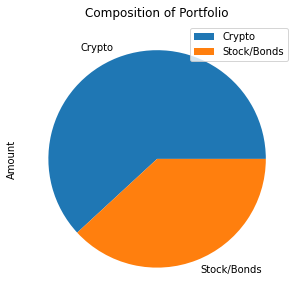

In [88]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
# Here we are creating a pie chart of the composition of the portfolio. 
savings_df.plot.pie(y="Amount", figsize=(5,5), title="Composition of Portfolio")


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [89]:
# Create a variable named emergency_fund_value
# Here we are creating a new variable and passing it the value of a previously set value times 3.
emergency_fund_value = monthly_income*3


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [103]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
# This is a conditional statement saying, if savings_data is greater or equal to emergency_fund_value then print a statement. Else, subract 
# savings_data from emergency_fund_value and set that to a variable named difference. then print a statement and pass the variable difference
# into the statement.
if sum(savings_data) >= emergency_fund_value:
   print(f" Congratulations, you have enough money in this fund.")
else:
   difference = emergency_fund_value - savings_data
   print(f" You are ${difference} away from reaching your goal.")




 Congratulations, you have enough money in this fund.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [45]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
# Here we are setting parameters for a new api call. We are saying the start of the data we want is on the start date, and the end of the data
# we are requesting is on the end date.
start_date= pd.Timestamp("2018-08-07", tz="America/New_York").isoformat()
end_date= pd.Timestamp("2021-08-07", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
# Here we are setting the limit of bars per symbol. the max is 1000
limit_rows = 1000

In [46]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
# Ok, Here is the actual api call, we are not using the requests function where we pass the url to the function, but this is a real deal api call.
# We are passing several parameters like the start_date and end_date and how many rows per symbol and timeframe. Then we assign the data to a new
# variable called alpaca_3_year_df.
alpaca_3_years_df = alpaca.get_barset(tickers,
                              timeframe,
                              start=start_date,
                              end=end_date,
                              limit=limit_rows).df


# Display both the first and last five rows of the DataFrame
# Here we are just displaying the data to make sure we got it.
display(alpaca_3_years_df.head())
display(alpaca_3_years_df.tail())


AGG                                         SPY  \
                             open    high       low    close   volume    open   
time                                                                            
2018-08-07 00:00:00-04:00  105.97  105.97  105.8250  105.840  2368151  285.39   
2018-08-08 00:00:00-04:00  105.83  105.91  105.8000  105.845  1613011  285.39   
2018-08-09 00:00:00-04:00  105.97  106.04  105.9329  106.030  2168479  285.53   
2018-08-10 00:00:00-04:00  106.11  106.36  106.1100  106.230  2555922  283.45   
2018-08-13 00:00:00-04:00  106.16  106.30  106.1501  106.285  2558386  283.47   

                                                               
                              high      low   close    volume  
time                                                           
2018-08-07 00:00:00-04:00  286.010  285.240  285.54  32455420  
2018-08-08 00:00:00-04:00  285.910  284.940  285.42  29142601  
2018-08-09 00:00:00-04:00  285.970  284.915  285.06  24338809  
2018-08-10 00:00:00-04:00  284.055  282.360  283.12  56622478  
2018-08-13 00:00:00-04:00  284.160  281.770  282.05  49247799

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2021-08-02 00:00:00-04:00  116.36  116.68  116.3050  116.53  4669027  440.34   
2021-08-03 00:00:00-04:00  116.56  116.69  116.5306  116.58  3021828  438.44   
2021-08-04 00:00:00-04:00  116.77  116.83  116.3000  116.57  4578711  439.77   
2021-08-05 00:00:00-04:00  116.46  116.48  116.2800  116.32  3170931  440.22   
2021-08-06 00:00:00-04:00  115.93  116.02  115.7800  115.79  3125122  442.10   

                                                               
                               high     low   close    volume  
time                                                           
2021-08-02 00:00:00-04:00  440.9300  437.21  437.58  54098311  
2021-08-03 00:00:00-04:00  441.2800  436.10  441.12  52043386  
2021-08-04 00:00:00-04:00  441.1243  438.73  439.01  40289514  
2021-08-05 00:00:00-04:00  441.8500  439.88  441.77  34903127  
2021-08-06 00:00:00-04:00  442.9400  441.80  442.52  40274051

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [47]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# Ok here we are using the MCSimulation function to run a Monte Carlo prediction function. We tell the simulation to weight the prediction the 
# way we want, wich is 40% AGG and 60% SPY. Then we say run the simulation 500 times, and use the data to predict what it will look like 30 years
# in the future. Pretty Cool.
MC_prices_30_years_df = MCSimulation(
    portfolio_data=alpaca_3_years_df,
    weights=[.4,.6],
    num_simulation=500,
    num_trading_days=252*30)

# Review the simulation input data
# Here we review the data that we are gonna run the simulation on.
MC_prices_30_years_df.portfolio_data.head()


AGG                                      \
                             open    high       low    close   volume   
time                                                                    
2018-08-07 00:00:00-04:00  105.97  105.97  105.8250  105.840  2368151   
2018-08-08 00:00:00-04:00  105.83  105.91  105.8000  105.845  1613011   
2018-08-09 00:00:00-04:00  105.97  106.04  105.9329  106.030  2168479   
2018-08-10 00:00:00-04:00  106.11  106.36  106.1100  106.230  2555922   
2018-08-13 00:00:00-04:00  106.16  106.30  106.1501  106.285  2558386   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2018-08-07 00:00:00-04:00          NaN  285.39  286.010  285.240  285.54   
2018-08-08 00:00:00-04:00     0.000047  285.39  285.910  284.940  285.42   
2018-08-09 00:00:00-04:00     0.001748  285.53  285.970  284.915  285.06   
2018-08-10 00:00:00-04:00     0.001886  283.45  284.055  282.360  283.12   
2018-08-13 00:00:00-04:00     0.000518  283.47  284.160  281.770  282.05   

                                                  
                             volume daily_return  
time                                              
2018-08-07 00:00:00-04:00  32455420          NaN  
2018-08-08 00:00:00-04:00  29142601    -0.000420  
2018-08-09 00:00:00-04:00  24338809    -0.001261  
2018-08-10 00:00:00-04:00  56622478    -0.006806  
2018-08-13 00:00:00-04:00  49247799    -0.003779

In [48]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# This is the command that actually initiates the simulation.
MC_prices_30_years_df.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/stephenthomas/Desktop/SCHOOL/Challenges/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004977,0.993833,0.992814,0.978973,0.998408,1.020013,1.005001,1.003828,1.007468,1.003334,...,0.998334,1.004835,0.991504,1.007168,0.996165,0.994218,0.994380,1.006128,0.990528,0.998424
2,1.006470,0.999737,1.007721,0.970777,0.988995,1.030903,0.996492,1.012231,1.022653,1.009148,...,0.991788,1.011407,0.985381,1.006322,0.997381,0.993033,0.993057,1.012845,1.003365,1.003006
3,0.999893,0.989658,0.999058,0.966471,0.993961,1.031403,1.008992,1.023105,1.034444,1.012905,...,0.998790,1.027469,0.984584,0.990790,0.988974,0.994712,1.000465,1.003933,1.002961,1.006959
4,0.999674,1.002663,0.998941,0.962403,0.993913,1.041647,1.010117,1.033021,1.041718,1.012556,...,1.008418,1.031275,0.982731,1.009322,0.975884,0.989718,0.997474,1.010159,0.983425,1.002172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,44.423375,52.094107,15.992854,14.796673,7.329870,25.741389,68.989707,16.600619,31.176741,20.861810,...,22.522488,25.221242,39.954295,25.796443,7.410700,36.296655,29.213166,24.424598,50.018281,24.486112
7557,44.490318,52.190406,15.869369,14.946874,7.329771,25.689159,68.072020,16.643565,31.009285,20.622382,...,22.596877,25.071292,39.642181,25.644793,7.503489,36.124284,29.360455,24.851662,50.057215,24.273283
7558,44.512368,51.896343,15.862022,14.971843,7.265699,25.985425,67.302067,16.463293,31.186752,20.679863,...,22.584485,24.504337,40.432915,25.175219,7.616071,36.200956,29.417275,24.510748,50.040259,24.458506
7559,44.246979,51.568003,15.949301,14.947821,7.292582,26.396809,66.968271,16.432872,31.141657,20.600420,...,22.570960,24.595222,40.420487,25.488533,7.580690,36.334838,29.281855,24.515651,50.754931,24.367979


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

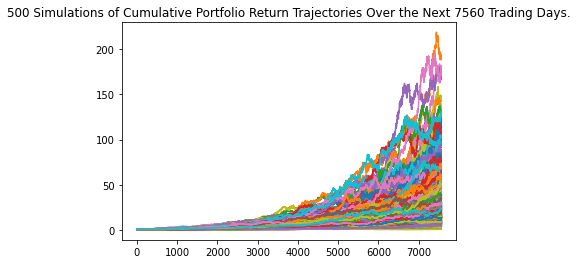

In [49]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# Here we create an overlay plot that plots the simulation, As you can see, there were some instanced were the simulation returned really high 
# predictions and others that were really low predictions.
MC_prices_30_years_df.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

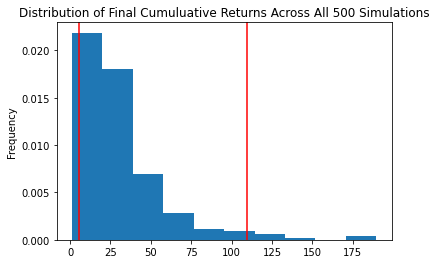

In [50]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# Here we create a histogram plot that presents the data that we got from the simulation in a different way as to help the user understand what the 
# simulation came up with. All these different plots are all meant to Understand the data. Data is not very helpful if we don't understand it.
# This is why there are so many different ways to plot, so we can extract max value from the data. Nobody can look at a huge dataframe and 
# notice all the nuances.
MC_prices_30_years_df.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [51]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
# Here we are getting the summary statistics, again to extract value out of the data and try to understand what it is saying.
MC_summary_statistics_30 = MC_prices_30_years_df.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(MC_summary_statistics_30)

count           500.000000
mean             31.550862
std              27.468791
min               1.165072
25%              14.301451
50%              24.544041
75%              38.314403
max             189.473452
95% CI Lower      5.534074
95% CI Upper    109.545976
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [52]:
# Print the current balance of the stock and bond portion of the members portfolio
# This is just a print command to see the value in USD of the current stocks & bonds portion of the portfolio.
print(total_stocks_bonds)


60689.5


In [53]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
# Here we use a 95% confidence interval to represent the lower and upper bounds of the cumulative performance of the portfolio. So we are saying
# multiply the total value of the stocks and bonds by the number that equals the lower and upper bands of where we have 95% confidence that the
# cumulative performance will be at. So we are saying in 30 years, we beleive with 95% confidence that the stocks and bonds will be somewhere in
# the middle of the lower and upper bands.
ci_lower_thirty_cumulative_return = MC_summary_statistics_30[8]* total_stocks_bonds
ci_upper_thirty_cumulative_return = MC_summary_statistics_30[9]* total_stocks_bonds

# Print the result of your calculations
print(f" There is a 95% chance that the stocks/bonds portion of this portfolio over the next 30 years will end in the range of"
      f" ${ci_lower_thirty_cumulative_return: .2f} and ${ci_upper_thirty_cumulative_return: .2f}.")


 There is a 95% chance that the stocks/bonds portion of this portfolio over the next 30 years will end in the range of $ 335860.19 and $ 6648290.49.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [54]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# Here we are running a another simulation with slightly different parameters. In the first simulation we ran it to predict 30 years in the future.
# In this simulation we are changing the weight of the portfolio inot more risky holdings, SPY and reducing the amount of bonds, and shortening the
# length of time that it will predict into the future to 10 years. The point is, if we can take a more risky position but retire quicker than 
# there is value in exploring this option. Here we keep the number of simulations the same at 500 and change the weight of the portfolio to 80%
# SPY and 20% AGG and run it to predict 10 years in the future.
MC_prices_10_years_df = MCSimulation(
    portfolio_data=alpaca_3_years_df,
    weights=[.2,.8],
    num_simulation=500,
    num_trading_days=252*10)

# Review the simulation input data
MC_prices_10_years_df.portfolio_data.head()


AGG                                      \
                             open    high       low    close   volume   
time                                                                    
2018-08-07 00:00:00-04:00  105.97  105.97  105.8250  105.840  2368151   
2018-08-08 00:00:00-04:00  105.83  105.91  105.8000  105.845  1613011   
2018-08-09 00:00:00-04:00  105.97  106.04  105.9329  106.030  2168479   
2018-08-10 00:00:00-04:00  106.11  106.36  106.1100  106.230  2555922   
2018-08-13 00:00:00-04:00  106.16  106.30  106.1501  106.285  2558386   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2018-08-07 00:00:00-04:00          NaN  285.39  286.010  285.240  285.54   
2018-08-08 00:00:00-04:00     0.000047  285.39  285.910  284.940  285.42   
2018-08-09 00:00:00-04:00     0.001748  285.53  285.970  284.915  285.06   
2018-08-10 00:00:00-04:00     0.001886  283.45  284.055  282.360  283.12   
2018-08-13 00:00:00-04:00     0.000518  283.47  284.160  281.770  282.05   

                                                  
                             volume daily_return  
time                                              
2018-08-07 00:00:00-04:00  32455420          NaN  
2018-08-08 00:00:00-04:00  29142601    -0.000420  
2018-08-09 00:00:00-04:00  24338809    -0.001261  
2018-08-10 00:00:00-04:00  56622478    -0.006806  
2018-08-13 00:00:00-04:00  49247799    -0.003779

In [55]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# Again, this is the actual command to initiat the simulation.
MC_prices_10_years_df.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/stephenthomas/Desktop/SCHOOL/Challenges/financial_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.985818,0.977752,1.011210,0.993592,0.983848,1.009301,1.010728,1.008736,0.987531,1.000348,...,1.008527,0.994467,1.001291,1.015994,0.998244,0.994099,0.979542,0.998552,1.024955,1.017938
2,0.976160,0.977625,1.000000,0.973502,0.986334,0.997908,1.001405,1.000458,0.975416,1.004514,...,1.028896,1.009039,0.993952,1.017417,0.995050,0.991444,0.979637,1.009565,1.014825,1.023245
3,0.977371,0.978919,0.996491,0.981748,0.994368,0.995028,0.983889,1.018123,0.970324,1.016253,...,1.022453,1.018024,0.999990,1.002634,1.006934,0.979901,0.982969,1.004922,1.026201,1.032301
4,0.982128,0.978907,1.009390,0.979493,1.014337,0.993724,0.973991,1.019042,0.968261,1.004752,...,0.991810,1.020795,0.995189,1.006579,0.990840,0.970811,0.990643,0.983571,1.030320,1.022220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.351852,2.637596,9.201119,3.089298,5.096897,1.540875,1.963848,2.637026,4.259919,5.447279,...,5.171870,2.502803,4.002795,5.006201,1.310924,0.954785,2.765688,10.370924,3.177474,4.003595
2517,3.396407,2.647790,9.349043,3.127145,5.157792,1.534809,1.957474,2.652916,4.276872,5.438129,...,5.116492,2.533788,4.044842,4.982261,1.320247,0.973031,2.746240,10.504760,3.159497,3.963398
2518,3.408247,2.601099,9.461960,3.093258,5.062363,1.514095,1.972957,2.623810,4.271548,5.481157,...,5.177647,2.495096,4.077889,4.983240,1.312583,0.979628,2.775125,10.359899,3.228420,3.939244
2519,3.336826,2.552688,9.492208,3.054413,5.142426,1.497755,1.978079,2.613816,4.286687,5.500185,...,5.222215,2.479348,4.078126,4.984105,1.323451,0.978629,2.804430,10.102178,3.225660,3.923713


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

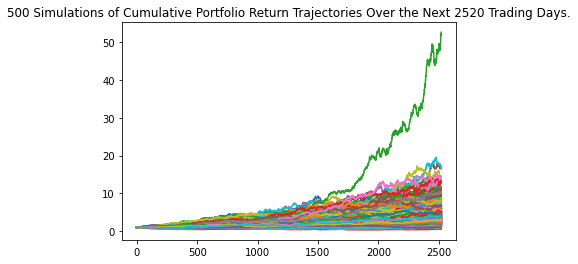

In [56]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# Here we are creating an overlay plot with the predictions from the simulation. As you can see, because the portfolio was weighted 80% SPY and 20%
# AGG we get a much more consolidated and narrow band of prediction values. Except for the 1 outlier.
MC_prices_10_years_df.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

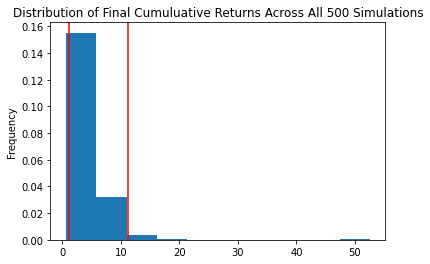

In [57]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# Here we are plotting a histogram to see if that helps to interpret the meaning of our simulation. Again, its clear that we have a much more
# narrow band of data.
MC_prices_10_years_df.plot_distribution()


In [58]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# This is how we get the summary statistics of the prediction data.
MC_summary_statistics_10 = MC_prices_10_years_df.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(MC_summary_statistics_10)

count           500.000000
mean              4.200975
std               3.311745
min               0.557874
25%               2.404805
50%               3.509473
75%               5.155106
max              52.606142
95% CI Lower      1.073287
95% CI Upper     11.134088
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [59]:
# Print the current balance of the stock and bond portion of the members portfolio
# Here we are just printing the value of the portion of the portfolio that s made up of stocks & bonds.
total_stocks_bonds

60689.5

In [60]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
# This is the command we use to ascertain what the cumulative performance of the portfolio will be with a 95% confidence level. So we can get 
# range of the probable cumulative returns for 10 years in the future.
ci_lower_ten_cumulative_return = MC_summary_statistics_10[8]* total_stocks_bonds
ci_upper_ten_cumulative_return = MC_summary_statistics_10[9]* total_stocks_bonds

# Print the result of your calculations
print(f" There is a 95% chance that the stocks/bonds portion of this portfolio over the next 10 years will end in the range of"
      f" ${ci_lower_ten_cumulative_return: .2f} and ${ci_upper_ten_cumulative_return: .2f}.")



 There is a 95% chance that the stocks/bonds portion of this portfolio over the next 10 years will end in the range of $ 65137.27 and $ 675722.22.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

No, After weighting the portfolio with 80% SPY and 20% AGG and running the simulation for 10 years, we did not see enough profit with a high confidence level to be able to retire. Now after 30 years I think its safe to say yes, its safe to retire, but 10 years was just not long enough to return the type of gains that I would feel comfortable retiring with. 